### 1. Merging all the Stock Files Together to extract the Close price for Sharpe Ratio Calculations

In [2]:
import os
import pandas as pd

# Set the path to the directory containing the CSV files
directory_path = "../Data Collection & Processing/top25_SP500"

# Get a list of all CSV files in the directory
all_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Read each CSV file into a DataFrame and store them in a list
df_list = []
for file in all_files:
    symbol = os.path.splitext(os.path.basename(file))[0]  # Extract symbol from filename
    df = pd.read_csv(file)
    df['symbol'] = symbol  # Add 'symbol' column with the stock symbol
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_merged = pd.concat(df_list, ignore_index=True)

# Save the merged DataFrame to a new CSV file
output_file = "../Data Collection & Processing/merged_top25_sp500_stock_data.csv"
df_merged.to_csv(output_file, index=True)  # Index will be written as 'date' column


In [3]:
# Read the merged stock data CSV file
merged_top25_sp500_stocks_df = pd.read_csv(
    '../Data Collection & Processing/merged_top25_sp500_stock_data.csv',
    index_col='Date', 
    infer_datetime_format=True,
    parse_dates=True
)

# Drop unnecessary columns
merged_top25_sp500_stocks_df = merged_top25_sp500_stocks_df.drop(['Unnamed: 0'], axis=1)

merged_top25_sp500_stocks_df.info()

display(merged_top25_sp500_stocks_df.head())
display(merged_top25_sp500_stocks_df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62925 entries, 2014-02-11 to 2024-02-09
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       62925 non-null  float64
 1   High       62925 non-null  float64
 2   Low        62925 non-null  float64
 3   Close      62925 non-null  float64
 4   Adj Close  62925 non-null  float64
 5   Volume     62925 non-null  int64  
 6   symbol     62925 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ MB


,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2014-02-11,18.950357,19.205357,18.910713,19.141430,16.860064,282256800,AAPL
2014-02-12,19.176786,19.270000,19.044287,19.139999,16.858810,308100800,AAPL
2014-02-13,19.094999,19.458929,19.078571,19.443930,17.126516,307398000,AAPL
2014-02-14,19.373928,19.499287,19.328930,19.428213,17.112673,272924400,AAPL
2014-02-18,19.500000,19.685356,19.486071,19.499643,17.175587,260251600,AAPL


,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2024-02-05,101.449997,102.379997,100.500000,101.550003,100.614922,17190900,XOM
2024-02-06,102.070000,103.040001,101.570000,102.250000,101.308472,13347900,XOM
2024-02-07,102.250000,102.730003,101.180000,102.220001,101.278748,13826800,XOM
2024-02-08,102.339996,104.419998,102.110001,103.970001,103.012634,19636900,XOM
2024-02-09,104.099998,104.839996,101.699997,101.769997,100.832893,20410500,XOM


### 2. Dropping all the columns and creating a new CSV file with the Date and Close price for each Stock

In [4]:
csv_path = "../Data Collection & Processing/merged_top25_sp500_stock_data.csv"
df = pd.read_csv(csv_path,index_col='Date',
    parse_dates=True,
    infer_datetime_format=True)
df = df.drop(columns=['Unnamed: 0', 'Open','High','Low', 'Adj Close','Volume'])
df = df.pivot( columns='symbol',values='Close')
display(df)
df.to_csv('top25_sp500_stocks.csv')


symbol,AAPL,ABBV,ADBE,AMZN,AVGO,BRK-B,COST,CRM,CVX,GOOG,...,MA,META,MRK,MSFT,NVDA,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-11,19.141430,49.660000,63.970001,18.089500,58.070000,113.610001,114.989998,61.230000,113.580002,29.643389,...,76.190002,64.849998,53.148853,37.169998,4.062500,78.839996,13.108000,70.620003,55.582500,90.839996
2014-02-12,19.139999,50.560001,65.139999,17.462500,58.939999,113.300003,114.809998,61.480000,112.029999,29.556465,...,75.970001,64.449997,52.480915,37.470001,4.207500,77.489998,13.021333,70.239998,56.042500,91.080002
2014-02-13,19.443930,50.349998,67.040001,17.860001,59.080002,114.699997,115.809998,63.130001,112.510002,29.885483,...,76.529999,67.330002,52.576336,37.610001,4.340000,77.800003,13.308667,71.209999,56.012501,91.430000
2014-02-14,19.428213,50.730000,68.339996,17.867500,58.080002,114.949997,116.099998,62.799999,113.480003,29.957710,...,77.389999,67.089996,52.900764,37.619999,4.477500,79.400002,13.215333,73.519997,56.500000,94.110001
2014-02-18,19.499643,51.459999,68.660004,17.682501,58.369999,114.730003,115.360001,63.730000,112.709999,30.158957,...,77.489998,67.300003,53.139313,37.419998,4.475000,77.970001,13.580000,73.830002,56.514999,94.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-05,187.679993,171.259995,630.500000,170.309998,1243.099976,390.760010,711.159973,288.109985,152.330002,144.929993,...,456.760010,459.410004,126.180000,405.649994,693.320007,158.210007,181.059998,502.959991,275.579987,101.550003
2024-02-06,189.300003,173.289993,607.140015,169.149994,1222.650024,393.739990,710.789978,285.829987,152.350006,145.410004,...,460.500000,454.720001,126.879997,405.489990,682.229980,158.960007,185.100006,510.670013,276.760010,102.250000
2024-02-07,189.410004,175.009995,615.849976,170.529999,1257.060059,397.660004,719.780029,288.839996,152.130005,146.679993,...,461.910004,469.589996,127.470001,414.049988,700.989990,159.119995,187.580002,519.390015,279.390015,102.220001


### 3. Loading the Stock and Benchmark close prices

##### Using the S&P 500, a collection of 500 big US companies, as a standard to see how well our investments are doing. When we use a stock index instead of the risk-free rate, it is called Information ratio. The Information Ratio tells us if our investment manager is doing better than simply investing in this big group. A high ratio means they're doing well, but a low one suggests we might be better off sticking with the big group instead!

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# For plots
plt.style.use('fivethirtyeight')
%matplotlib inline

stock_data = pd.read_csv('../Data Collection & Processing/top25_sp500_stocks.csv',parse_dates=['Date'],index_col=['Date']).dropna()
benchmark_data = pd.read_csv('../Data Collection & Processing/S&P_benchmarks.csv',parse_dates=['Date'],index_col=['Date']).dropna() 


# Display summary for stock_data
print('Stocks\n')
# ... YOUR CODE FOR TASK 2 HERE ...
stock_data.info()
print(stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
print(benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-02-11 to 2024-02-09
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   ABBV    2517 non-null   float64
 2   ADBE    2517 non-null   float64
 3   AMZN    2517 non-null   float64
 4   AVGO    2517 non-null   float64
 5   BRK-B   2517 non-null   float64
 6   COST    2517 non-null   float64
 7   CRM     2517 non-null   float64
 8   CVX     2517 non-null   float64
 9   GOOG    2517 non-null   float64
 10  GOOGL   2517 non-null   float64
 11  HD      2517 non-null   float64
 12  JNJ     2517 non-null   float64
 13  JPM     2517 non-null   float64
 14  LLY     2517 non-null   float64
 15  MA      2517 non-null   float64
 16  META    2517 non-null   float64
 17  MRK     2517 non-null   float64
 18  MSFT    2517 non-null   float64
 19  NVDA    2517 non-null   float64
 20  PG      2517 non-null   float64
 21  TSLA    251

### 4. Visualise daily prices for all 25 Stocks

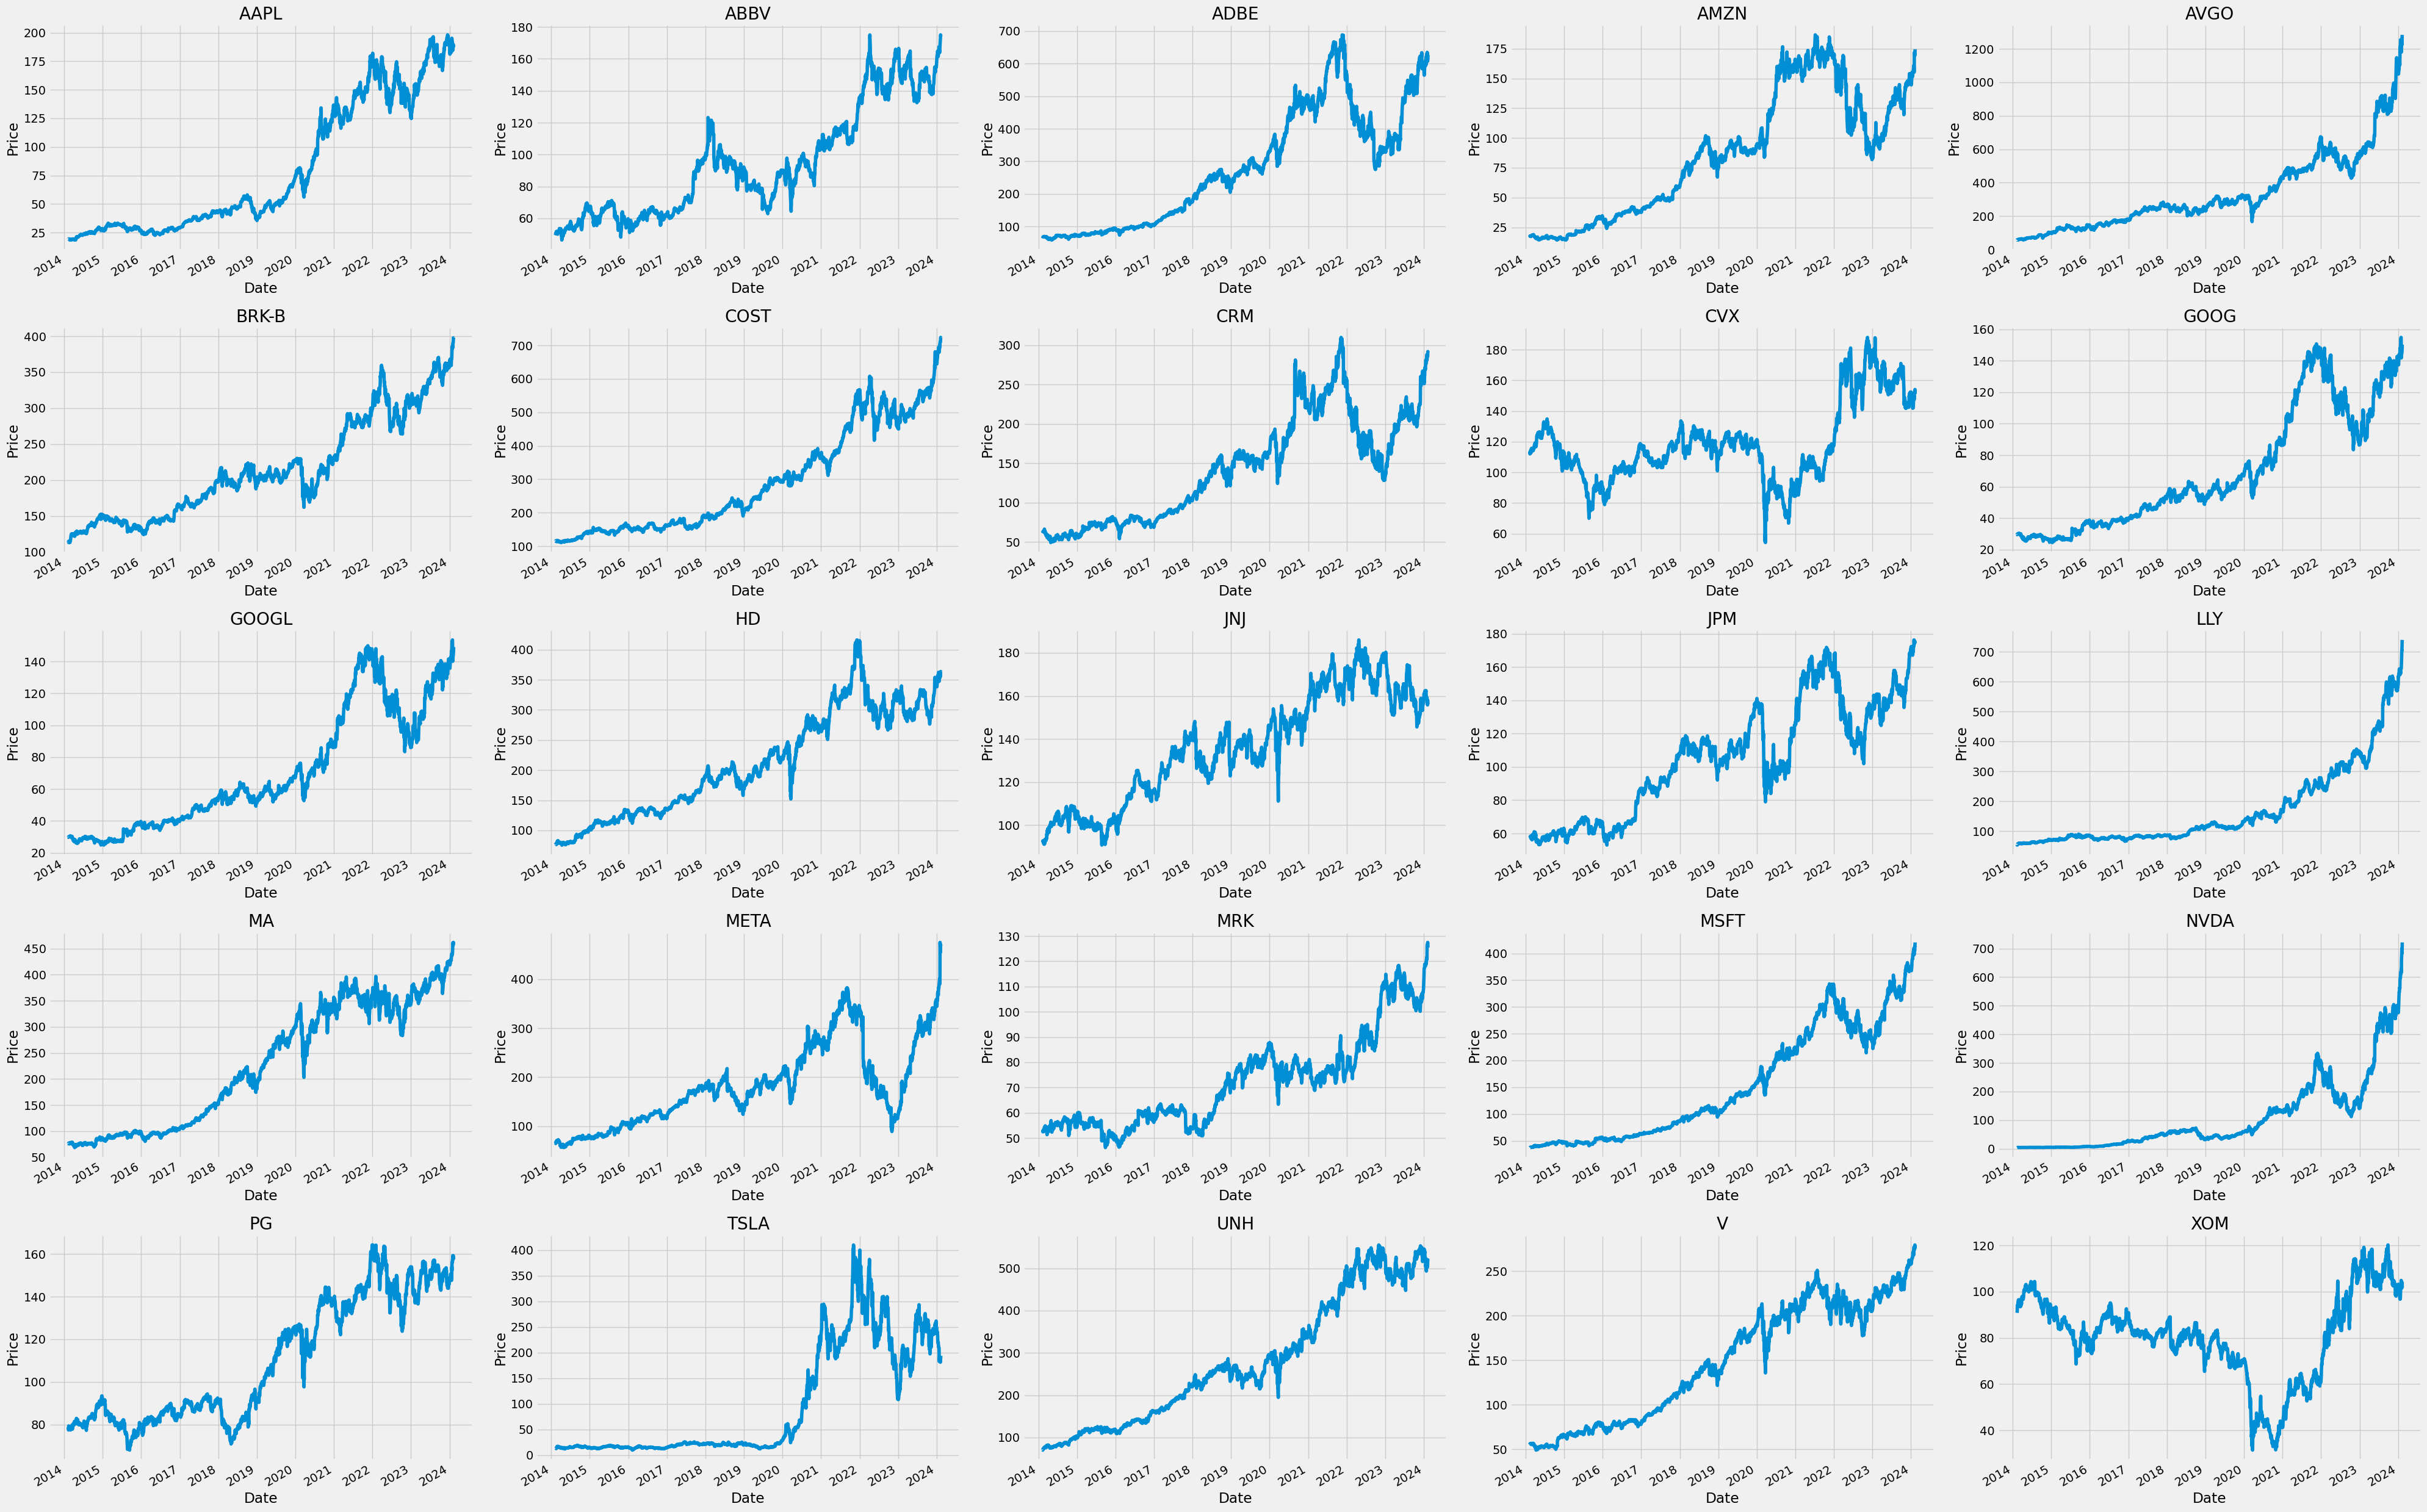

,AAPL,ABBV,ADBE,AMZN,AVGO,BRK-B,COST,CRM,CVX,GOOG,...,MA,META,MRK,MSFT,NVDA,PG,TSLA,UNH,V,XOM
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,79.775043,94.165967,280.130513,85.918551,337.937362,214.634708,291.922209,143.250409,118.238538,70.328837,...,227.340048,181.821498,72.129238,153.798089,107.180737,109.887295,96.240093,278.071470,148.196182,80.479948
std,57.044171,33.890095,177.738460,51.509100,231.327279,70.248748,155.299578,66.844556,25.261904,37.902699,...,117.400107,83.405344,18.324086,104.129032,128.475077,28.650804,108.817756,148.469559,65.584483,18.696192
min,18.476786,46.459999,58.630001,14.347500,57.700001,113.099998,110.650002,49.130001,54.220001,24.560070,...,68.680000,56.139999,46.202290,37.169998,4.062500,68.059998,9.578000,70.239998,49.157501,31.450001
25%,30.500000,64.370003,99.620003,37.683498,164.839996,147.910004,156.009995,77.370003,102.320000,38.125999,...,98.870003,117.349998,56.345421,56.919998,14.722500,83.269997,16.002666,139.190002,79.660004,71.750000
50%,49.695000,88.000000,262.339996,87.774498,264.730011,201.559998,233.919998,146.000000,114.989998,57.616001,...,221.389999,171.470001,71.469467,112.260002,53.447498,98.029999,22.219999,248.750000,147.350006,82.050003
75%,137.130005,115.750000,431.670013,129.330002,477.839996,277.920013,435.070007,195.720001,126.099998,102.410004,...,343.410004,228.070007,80.696564,246.789993,152.652496,138.630005,203.330002,412.500000,209.100006,91.699997
max,198.110001,175.009995,688.369995,186.570496,1283.439941,398.359985,724.159973,309.959991,188.050003,154.839996,...,461.910004,474.989990,127.470001,420.549988,721.330017,164.210007,409.970001,555.150024,279.390015,120.199997


In [6]:
# Create subplots for each stock
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(40, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each stock on a separate subplot
for i, (symbol, data) in enumerate(stock_data.items()):
    ax = axes[i]
    data.plot(ax=ax, kind='line', title=symbol, legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


# Summarize the stock_data
stock_data.describe()

### 5. Visualize daily values for the S&P 500

,Close
count,2517.000000
mean,3039.171903
std,912.913720
min,1815.690000
25%,2139.760000
50%,2815.620000
75%,3935.180000
max,5026.610000


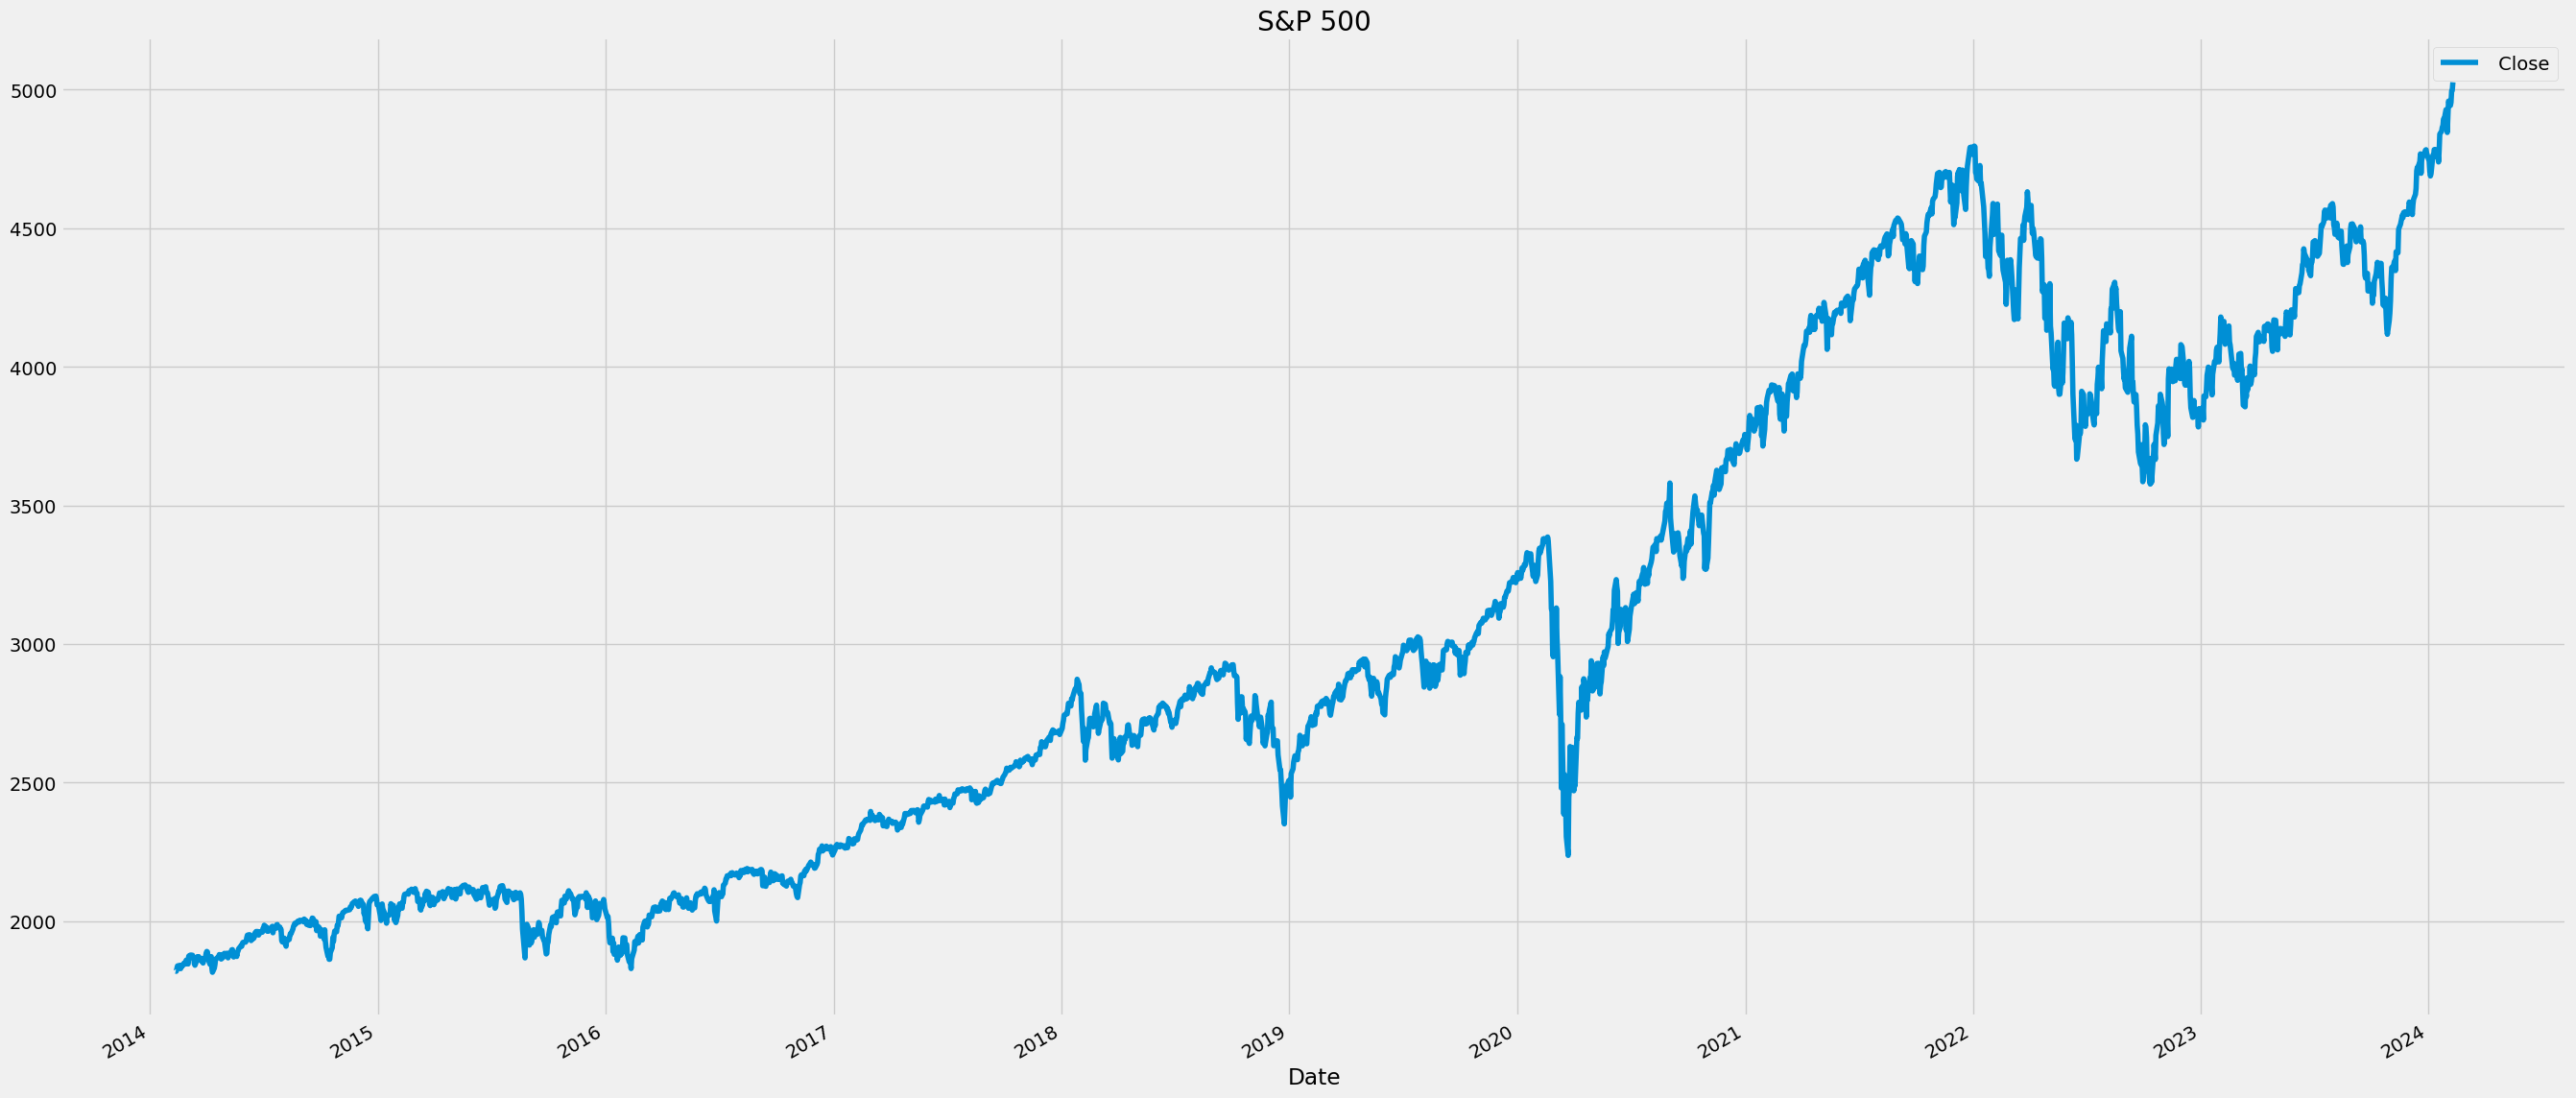

In [7]:
# plot the benchmark_data
benchmark_data.plot(kind='line',title='S&P 500', figsize=(30, 15))


# summarize the benchmark_data
benchmark_data.describe()

### 6. First input for Sharpe Ratio: Daily Stock Price Returns (Percentage Change)

##### The Sharpe Ratio compares the returns of two investment options. However, the data only provide the historical value of each investment, not the return. To calculate the return, I need to compute the percentage change in value from one day to the next. Additionally, I will examine the summary statistics, as these will serve as inputs for calculating the Sharpe Ratio.

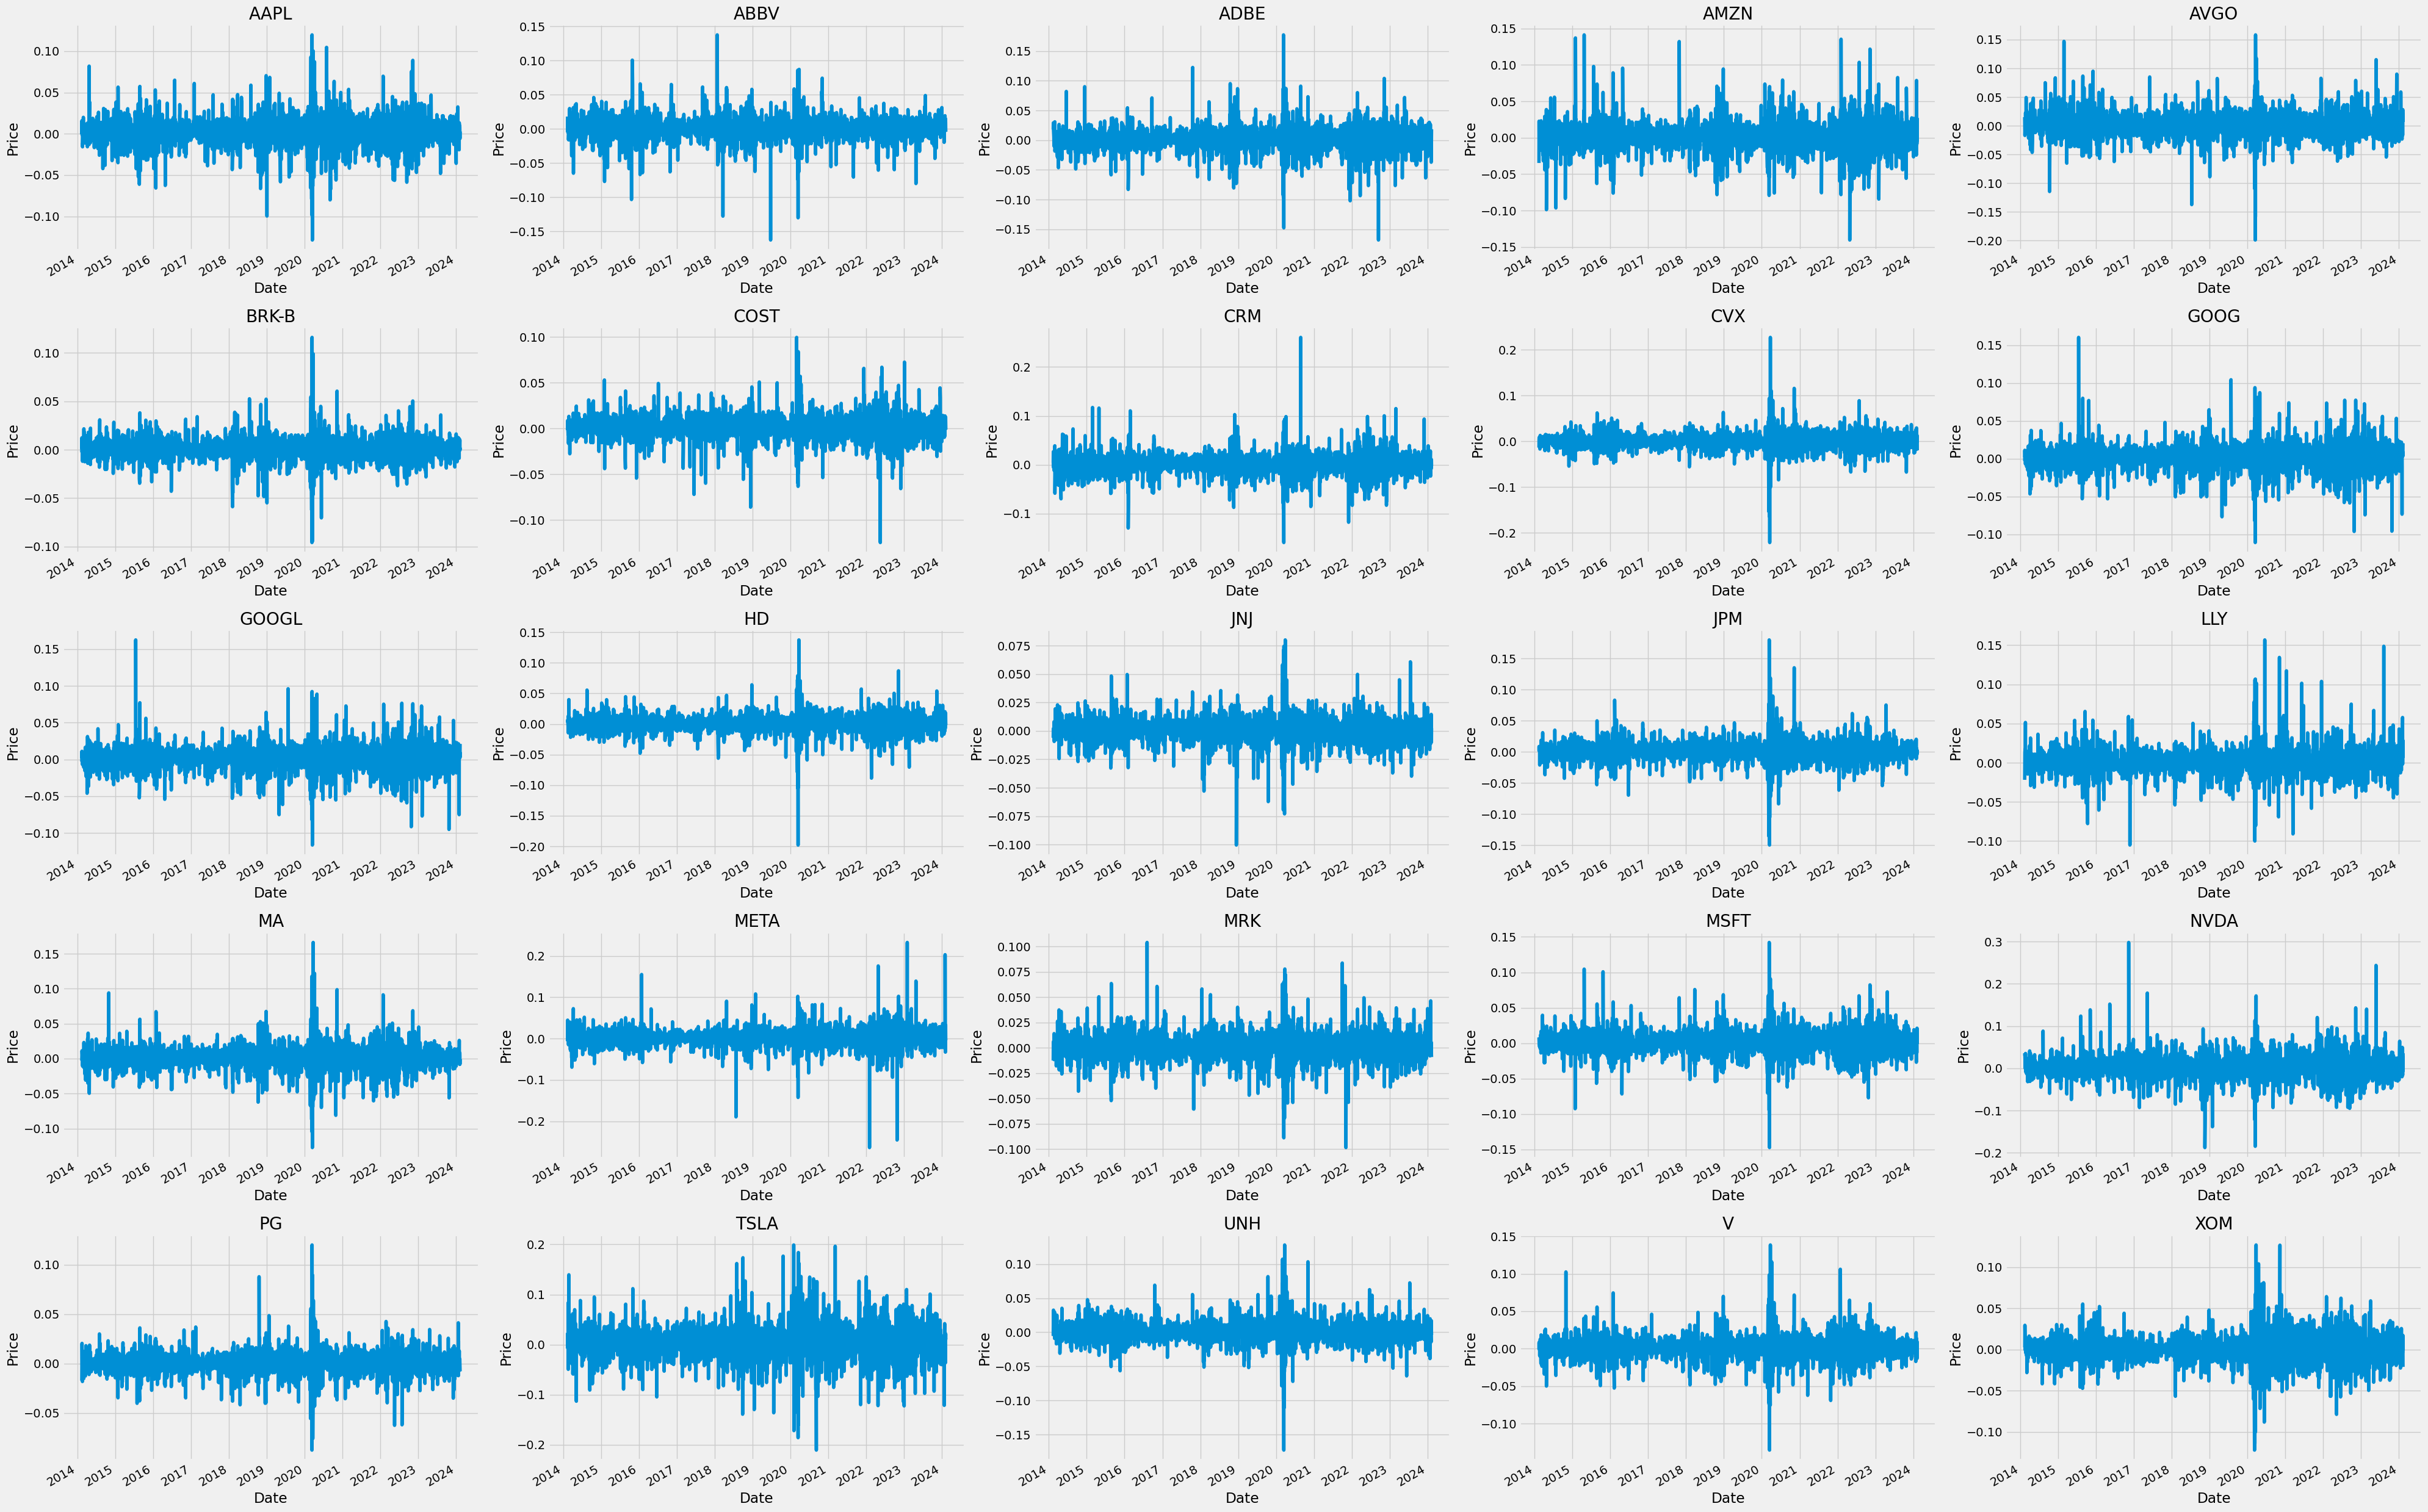

,AAPL,ABBV,ADBE,AMZN,AVGO,BRK-B,COST,CRM,CVX,GOOG,...,MA,META,MRK,MSFT,NVDA,PG,TSLA,UNH,V,XOM
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,...,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.001069,0.000642,0.001113,0.001117,0.001473,0.000572,0.000821,0.000857,0.000288,0.000800,...,0.000859,0.001069,0.000432,0.001109,0.002485,0.000342,0.001680,0.000921,0.000758,0.000198
std,0.017823,0.016870,0.020241,0.020806,0.021959,0.012114,0.013365,0.021820,0.018642,0.017607,...,0.017088,0.023682,0.013482,0.017019,0.029283,0.011580,0.034948,0.016000,0.015534,0.017484
min,-0.128647,-0.162524,-0.167932,-0.140494,-0.199129,-0.095921,-0.124513,-0.158885,-0.221248,-0.111008,...,-0.127255,-0.263901,-0.098630,-0.147390,-0.187559,-0.087373,-0.210628,-0.172769,-0.135472,-0.122248
25%,-0.007289,-0.007103,-0.007562,-0.008718,-0.009986,-0.005258,-0.005431,-0.008818,-0.008039,-0.007104,...,-0.006926,-0.009418,-0.006421,-0.006850,-0.011482,-0.005068,-0.015380,-0.006875,-0.006599,-0.008209
50%,0.000776,0.001138,0.001488,0.001153,0.001335,0.000484,0.001071,0.000886,0.000410,0.000863,...,0.001373,0.001097,0.000399,0.000827,0.002359,0.000468,0.001179,0.000887,0.001316,0.000000
75%,0.010124,0.008626,0.010935,0.011287,0.012750,0.006555,0.007257,0.011466,0.008502,0.009258,...,0.008891,0.012325,0.007542,0.009805,0.016495,0.005973,0.018326,0.008272,0.008331,0.008531
max,0.119808,0.137673,0.177193,0.141311,0.158337,0.116099,0.099595,0.260449,0.227407,0.160524,...,0.166109,0.232824,0.104080,0.142169,0.298067,0.120090,0.198949,0.127989,0.138426,0.126868


In [8]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# Create subplots for each stock
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(40, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each stock on a separate subplot
for i, (symbol, data) in enumerate(stock_returns.items()):
    ax = axes[i]
    data.plot(ax=ax, kind='line', title=symbol, legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


# summarize the daily returns
stock_returns.describe()

### 7. First input for Sharpe Ratio: Daily S&P benchmark Returns (Percentage Change)

count    2516.000000
mean       -0.000341
std         0.011247
min        -0.085779
25%        -0.005636
50%        -0.000633
75%         0.003775
max         0.136158
Name:  Close, dtype: float64


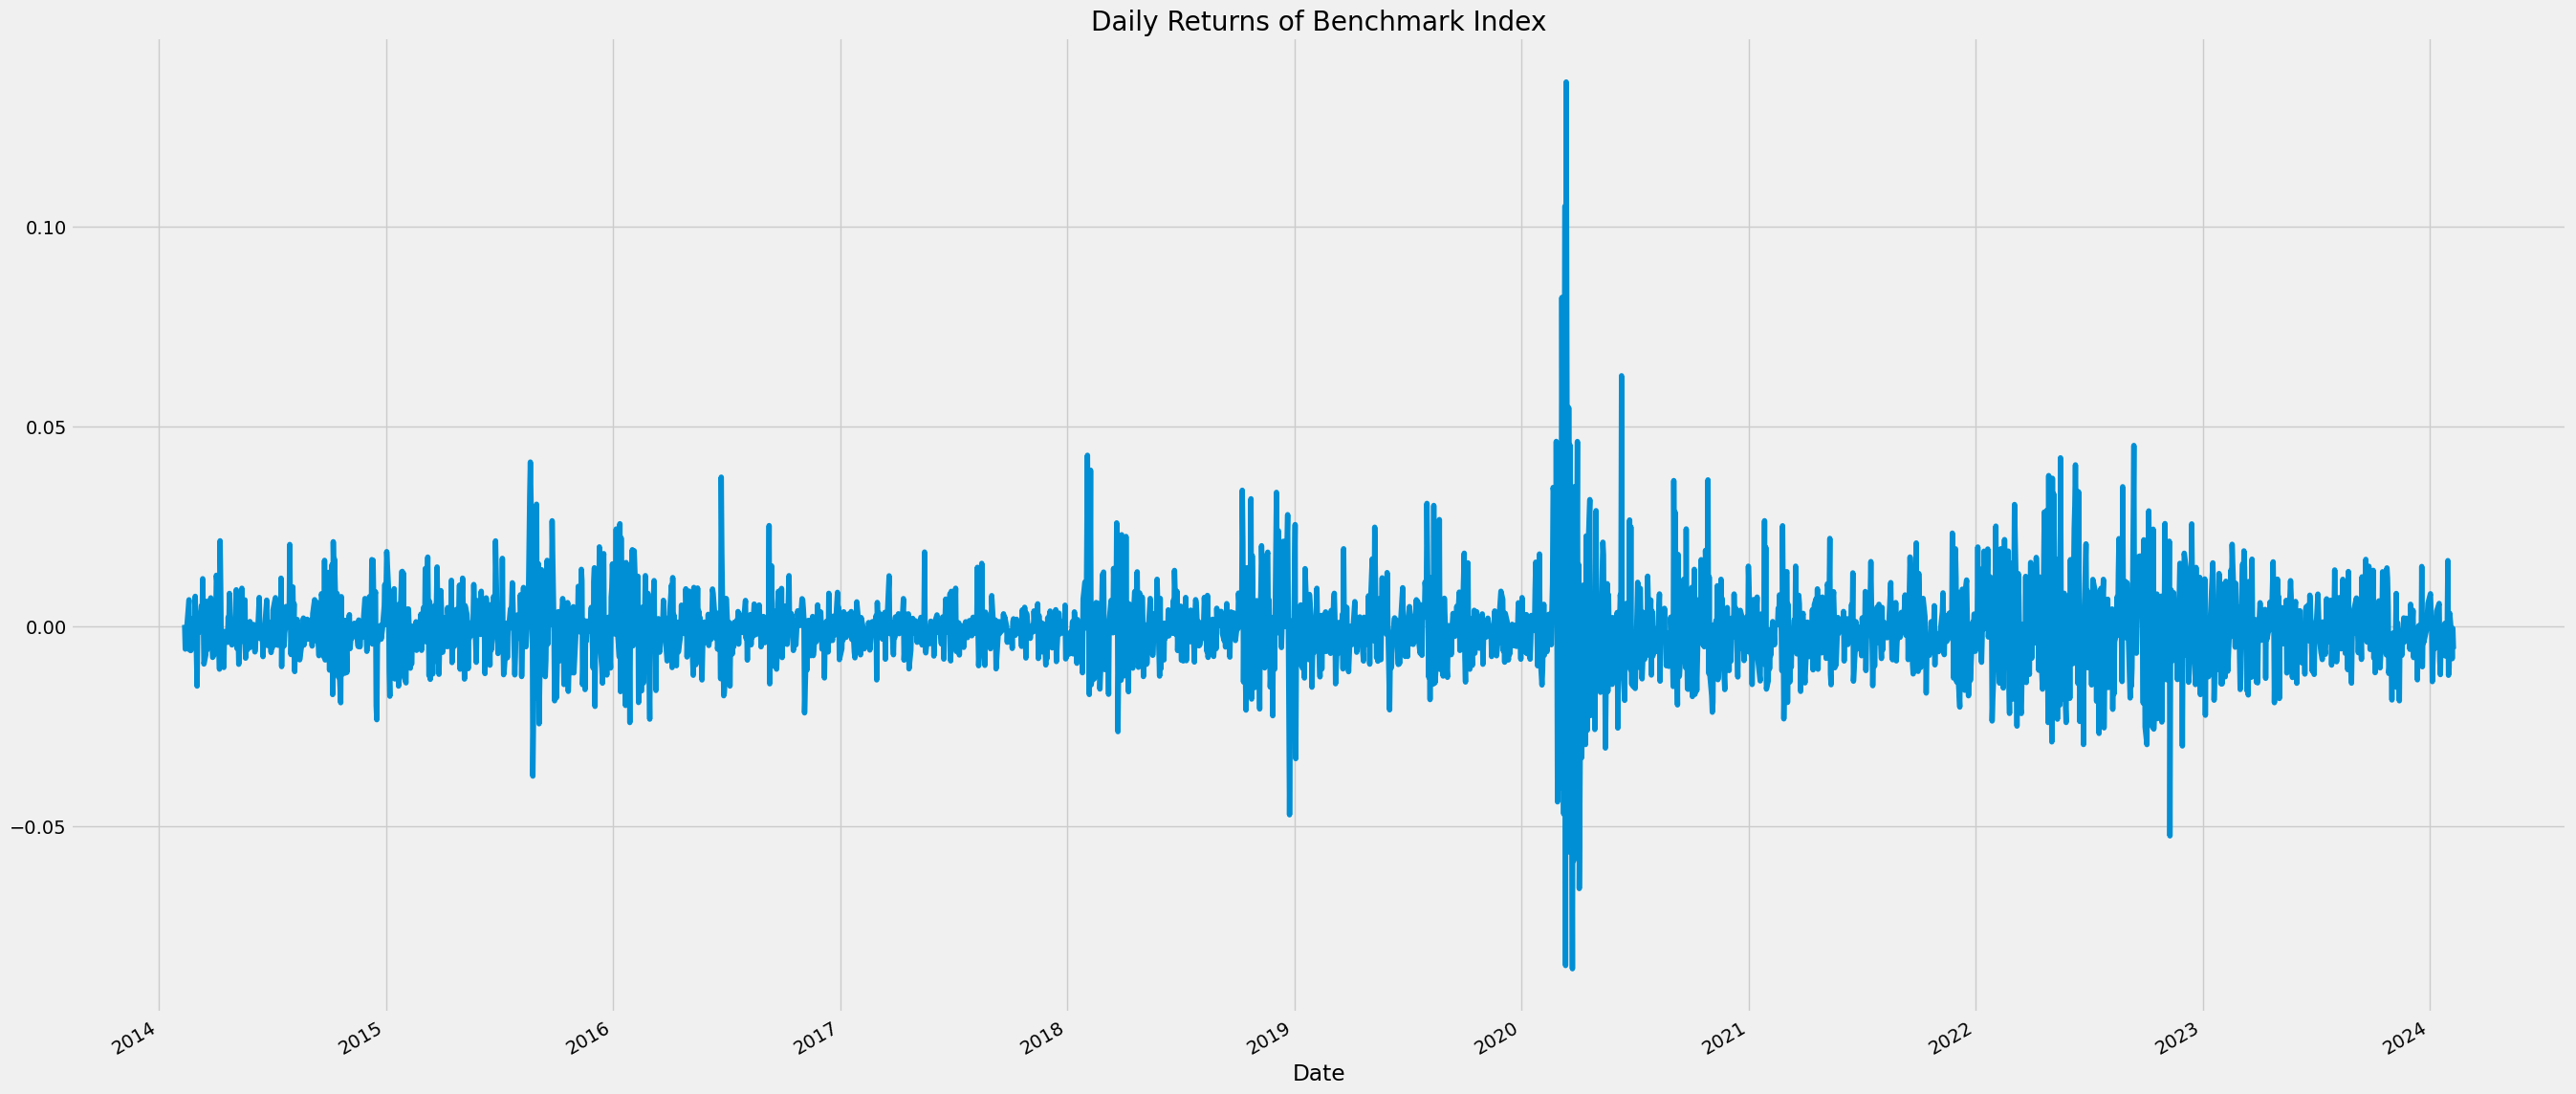

In [9]:
sp_returns = benchmark_data[' Close'].pct_change()

# Plot the daily returns
sp_returns.plot(kind='line', title='Daily Returns of Benchmark Index', figsize=(30, 15))

# Summarize the daily returns
print(sp_returns.describe())


### 8. Next, Calculate the Excesss Returns for the Stocks vs Benchmark data.
##### It is calculated as the difference in returns between stock_returns and sp_returns (Rx - Rf)

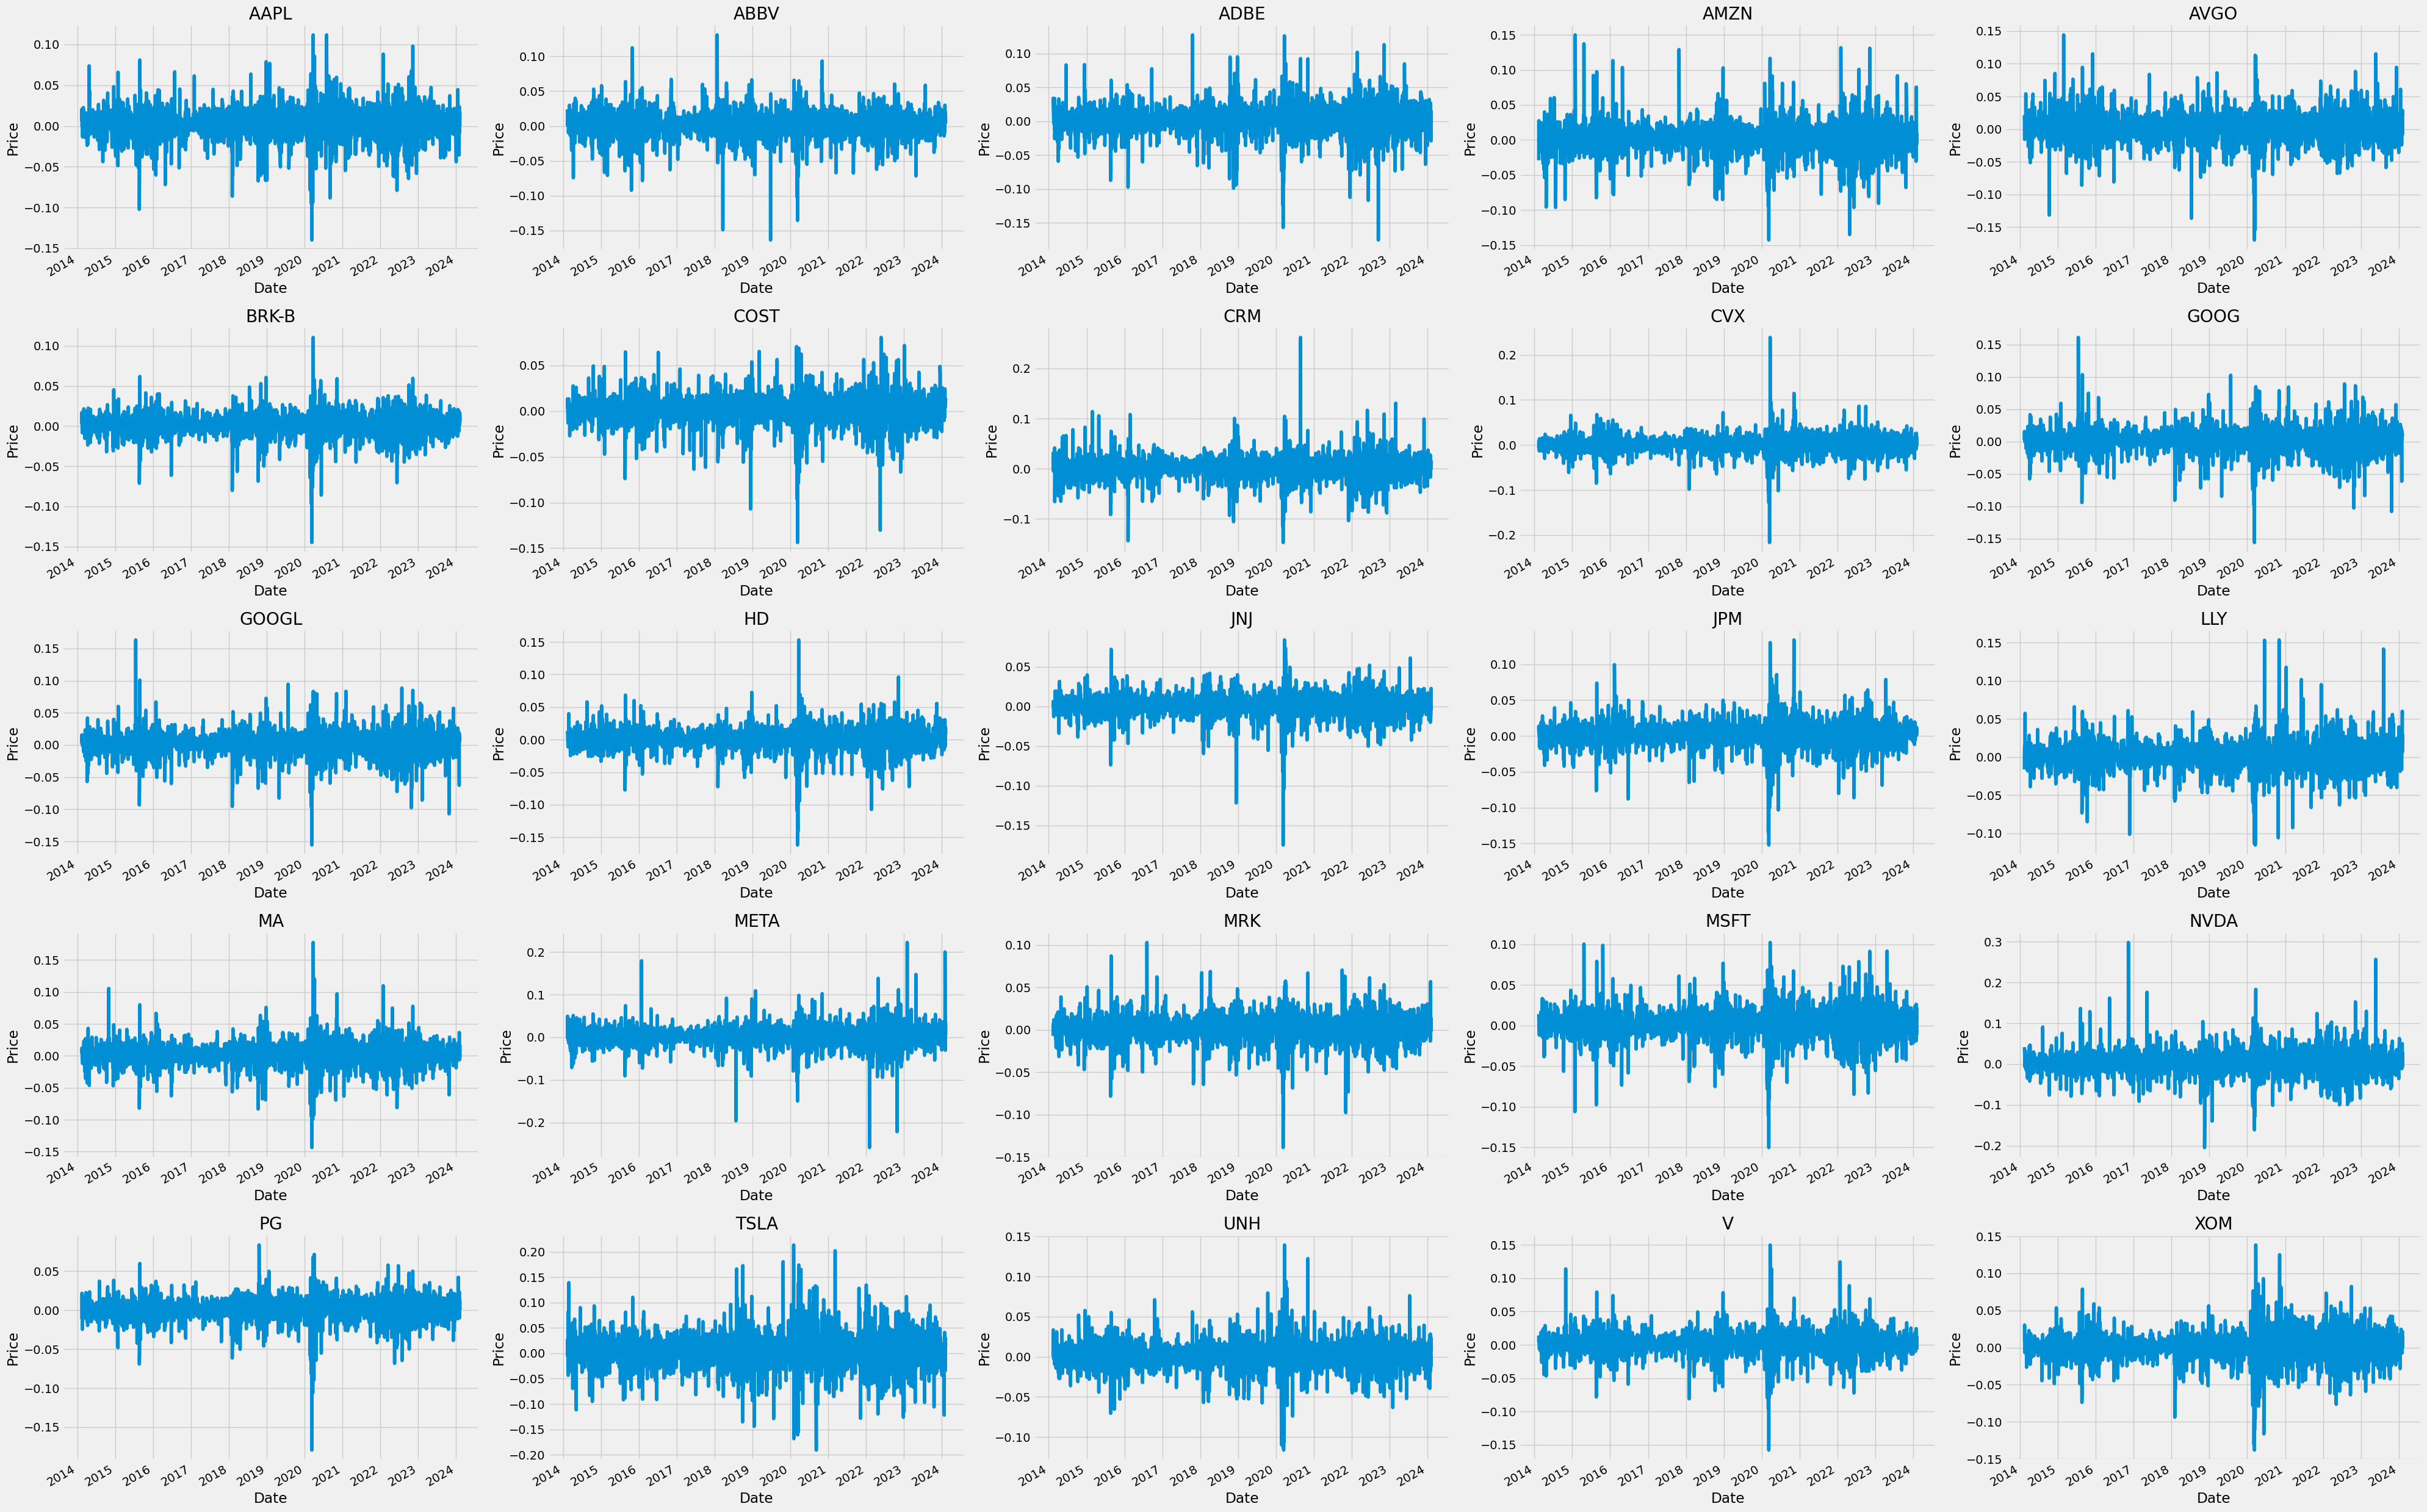

,AAPL,ABBV,ADBE,AMZN,AVGO,BRK-B,COST,CRM,CVX,GOOG,...,MA,META,MRK,MSFT,NVDA,PG,TSLA,UNH,V,XOM
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,...,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.001410,0.000985,0.001448,0.001448,0.001812,0.000913,0.001163,0.001199,0.000637,0.001133,...,0.001200,0.001413,0.000777,0.001445,0.002813,0.000686,0.002014,0.001264,0.001099,0.000548
std,0.019953,0.019505,0.022254,0.023153,0.023887,0.015206,0.016879,0.023858,0.020606,0.020088,...,0.019584,0.025488,0.016301,0.019282,0.030960,0.015162,0.036092,0.018407,0.018049,0.020098
min,-0.139840,-0.163759,-0.175166,-0.142619,-0.169507,-0.145015,-0.143798,-0.147071,-0.216562,-0.155860,...,-0.143639,-0.258770,-0.138882,-0.150412,-0.204483,-0.179436,-0.190881,-0.116205,-0.157958,-0.138052
25%,-0.008005,-0.008262,-0.008649,-0.009127,-0.010899,-0.006414,-0.006619,-0.009790,-0.009184,-0.008303,...,-0.007898,-0.009844,-0.007444,-0.007830,-0.012880,-0.006560,-0.015902,-0.007744,-0.007268,-0.009297
50%,0.001983,0.001596,0.002526,0.001994,0.001987,0.001257,0.002029,0.001766,0.001173,0.001560,...,0.001784,0.001340,0.000749,0.001898,0.002867,0.001219,0.001282,0.001330,0.001647,0.000988
75%,0.012218,0.011140,0.012640,0.013282,0.014252,0.008782,0.009990,0.012975,0.010731,0.011494,...,0.011059,0.013975,0.010059,0.011382,0.018087,0.008466,0.019969,0.010916,0.010380,0.010415
max,0.111818,0.130896,0.127509,0.149913,0.144089,0.110521,0.080676,0.262119,0.238810,0.161295,...,0.177513,0.222361,0.103172,0.102299,0.297952,0.083668,0.213708,0.139393,0.149830,0.138271


In [10]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# Create subplots for each stock
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(40, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each stock on a separate subplot
for i, (symbol, data) in enumerate(excess_returns.items()):
    ax = axes[i]
    data.plot(ax=ax, kind='line', title=symbol, legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

# summarize the excess_returns
excess_returns.describe()

### 9. Start of Sharpe Ratio Calculation (Get the Average of the Rx-Rf in No.8)

##### This indicates the daily difference in yield between the investment and the benchmark.

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

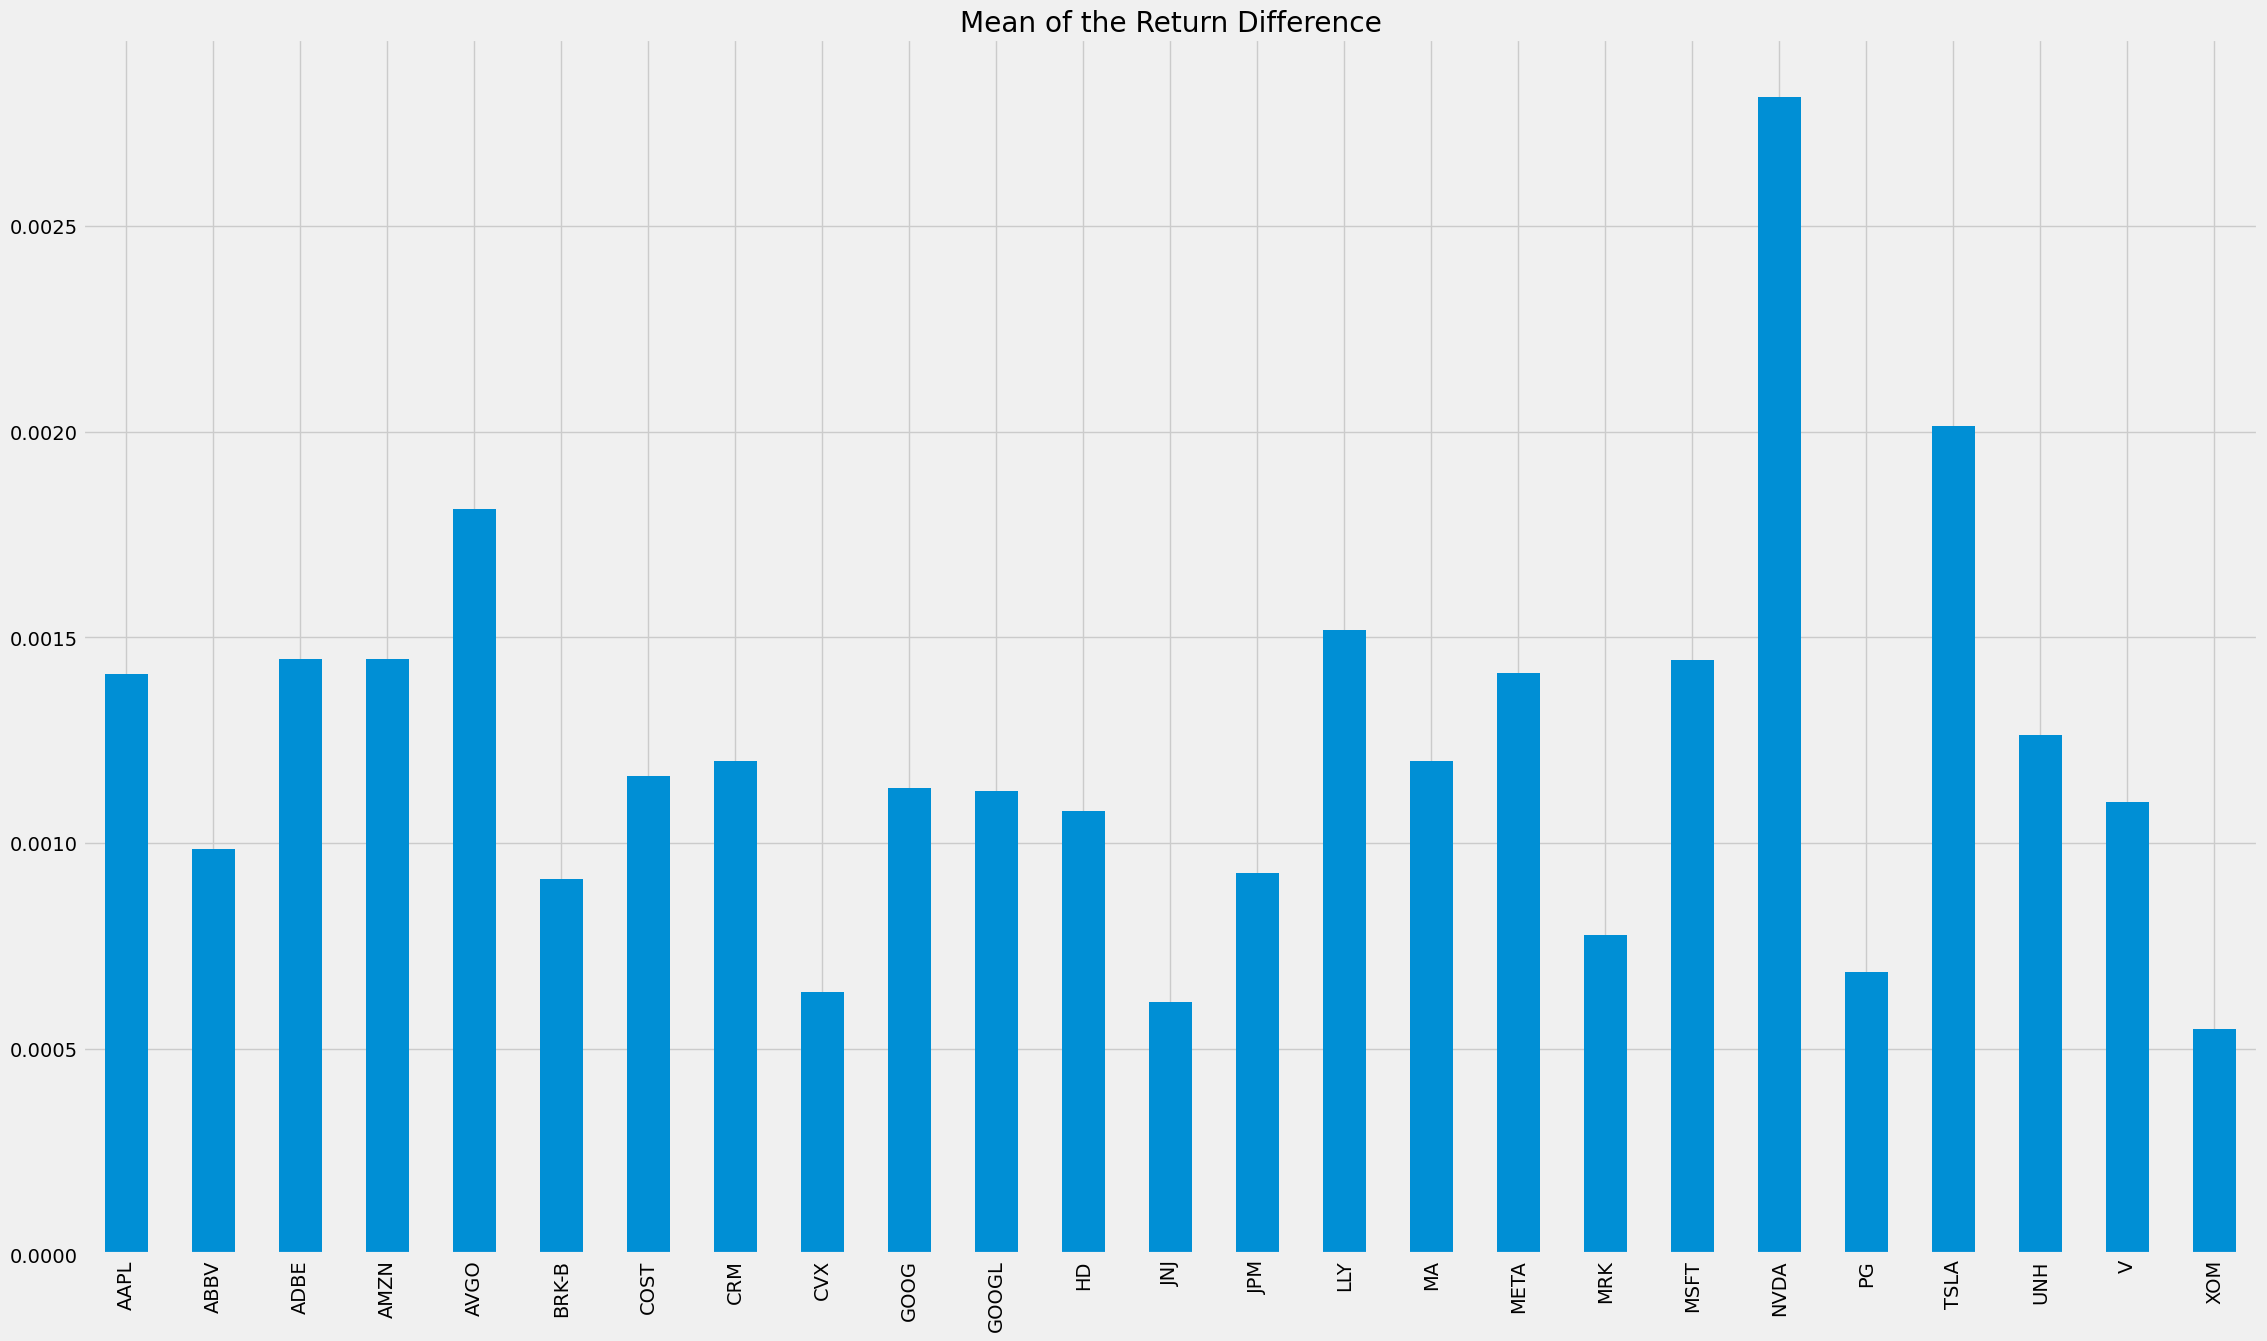

In [11]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference', figsize=(25, 15))

### 10. Next, for the Sharpe Ratio Calculation (Get the Standard Deviation of the excess_returns)

##### This illustrates the level of risk associated with investing in stocks compared to investing in the S&P 500.

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

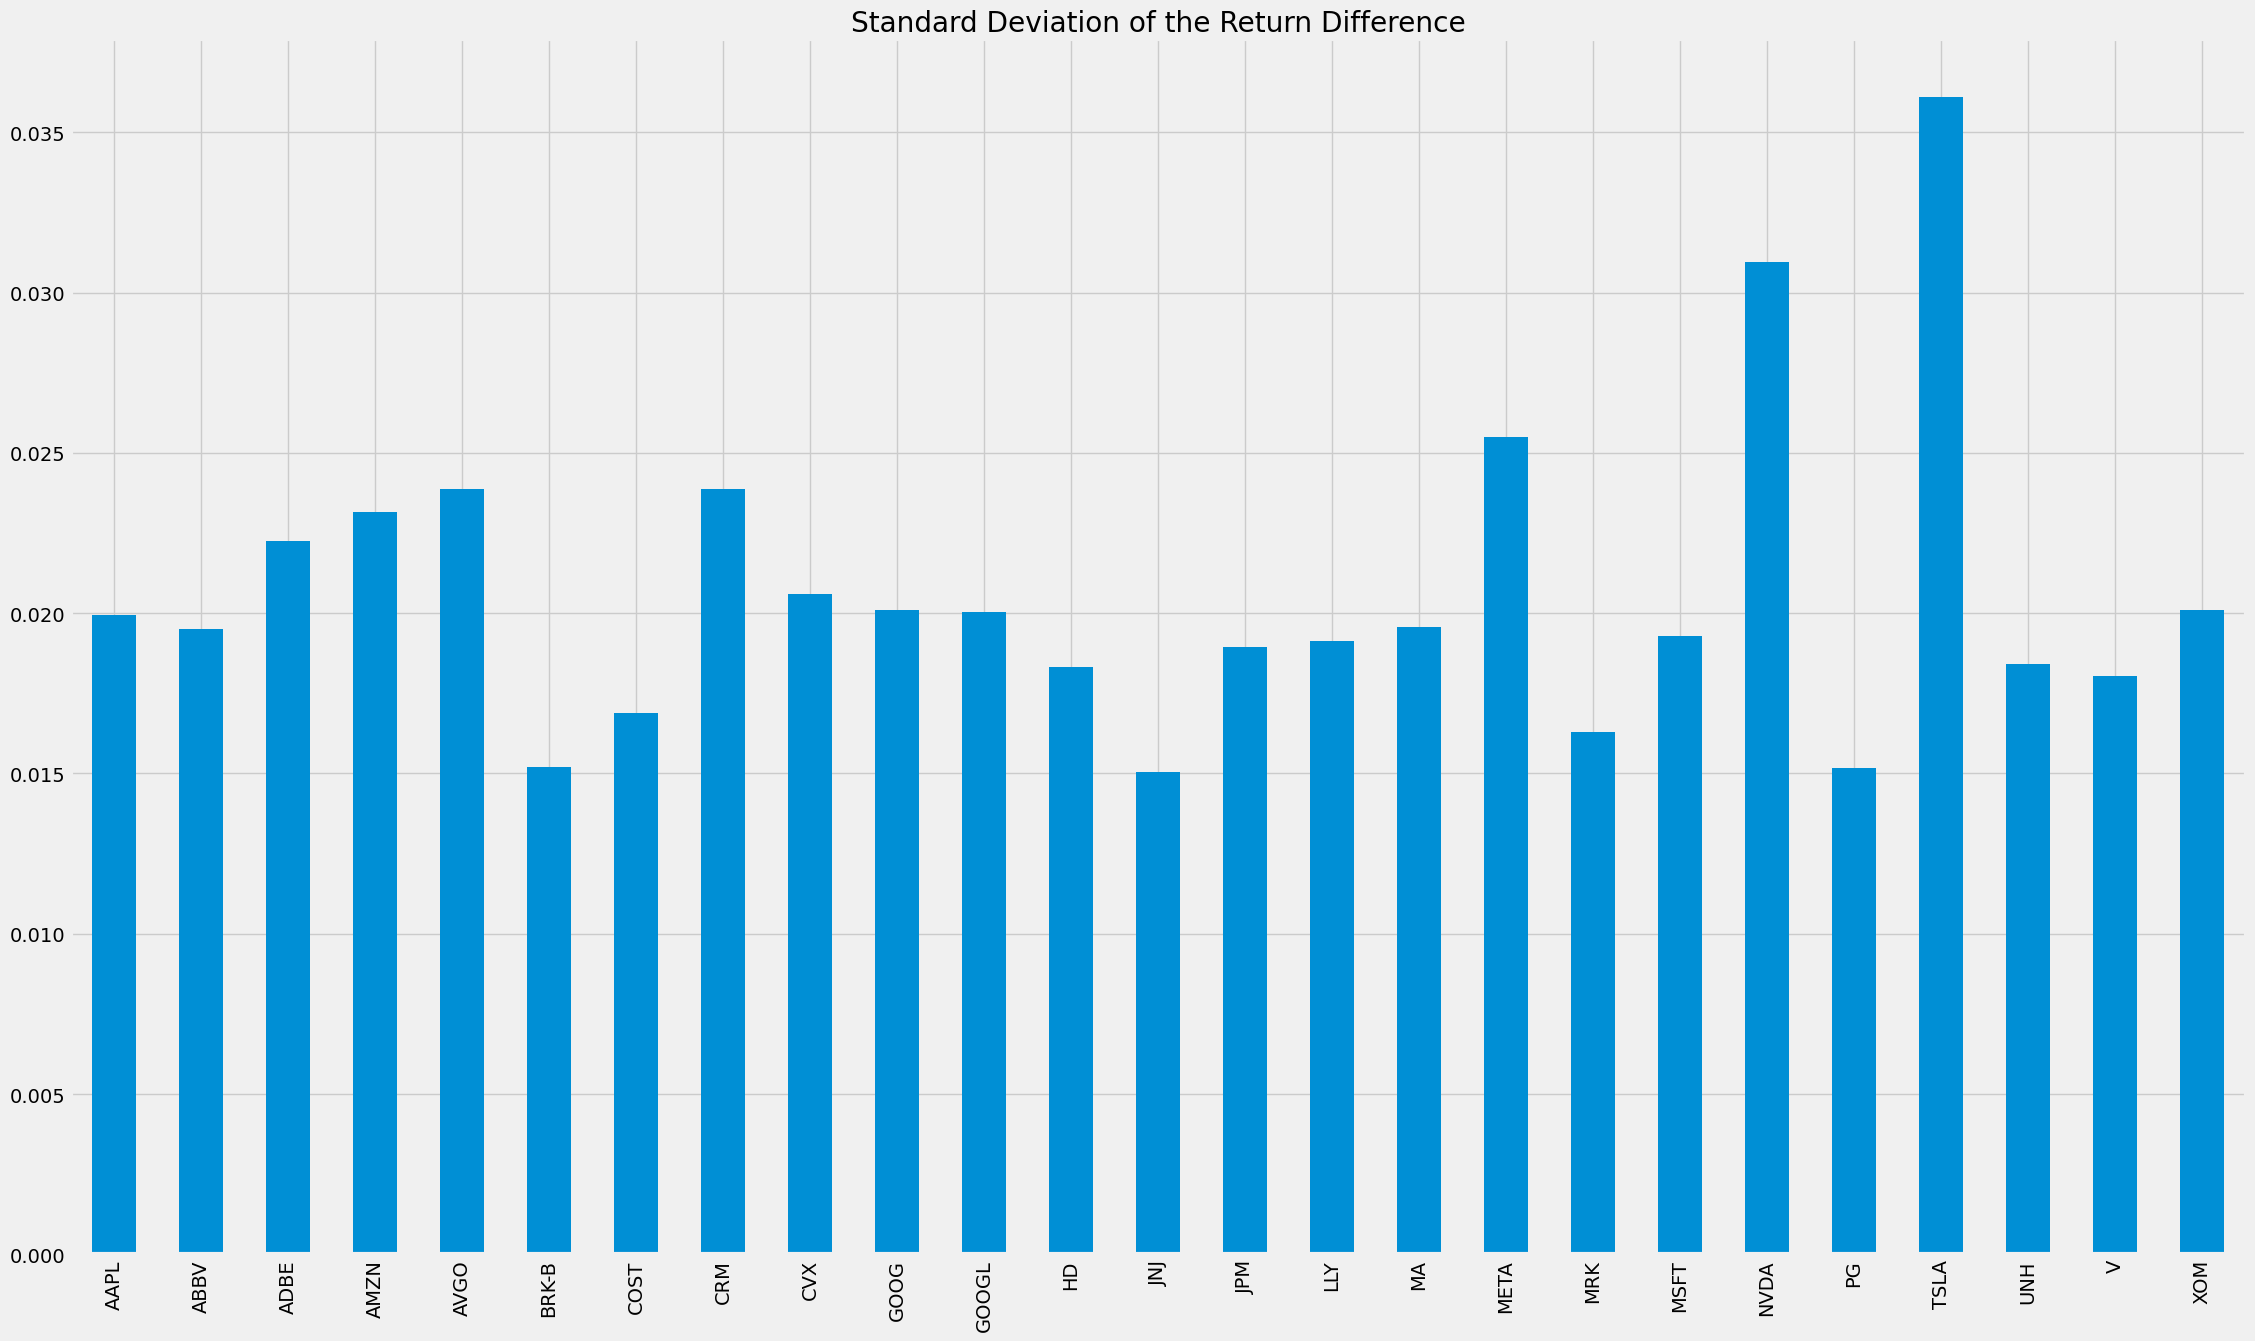

In [12]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference', figsize=(25, 15))

### 11. Calculating the Sharpe Ratio
##### Now, we simply divide the average excess returns by the standard deviation of excess returns. This gives us the Sharpe ratio, which reveals how much additional return (or less) the investment opportunity provides per unit of risk.

##### To make the Sharpe Ratio easier to compare across different timeframes, it's often annualized. We do this by multiplying it by the square root of the number of periods. Since we're using daily data, we'll multiply by the square root of the number of trading days in a year, which is approximately 2517 (based on the loaded data in No.3).

,Annualized Sharpe Ratio
AAPL,3.544165
ABBV,2.533884
ADBE,3.263483
AMZN,3.136657
AVGO,3.805401
BRK-B,3.011325
COST,3.455865
CRM,2.521383
CVX,1.551581
GOOG,2.830314


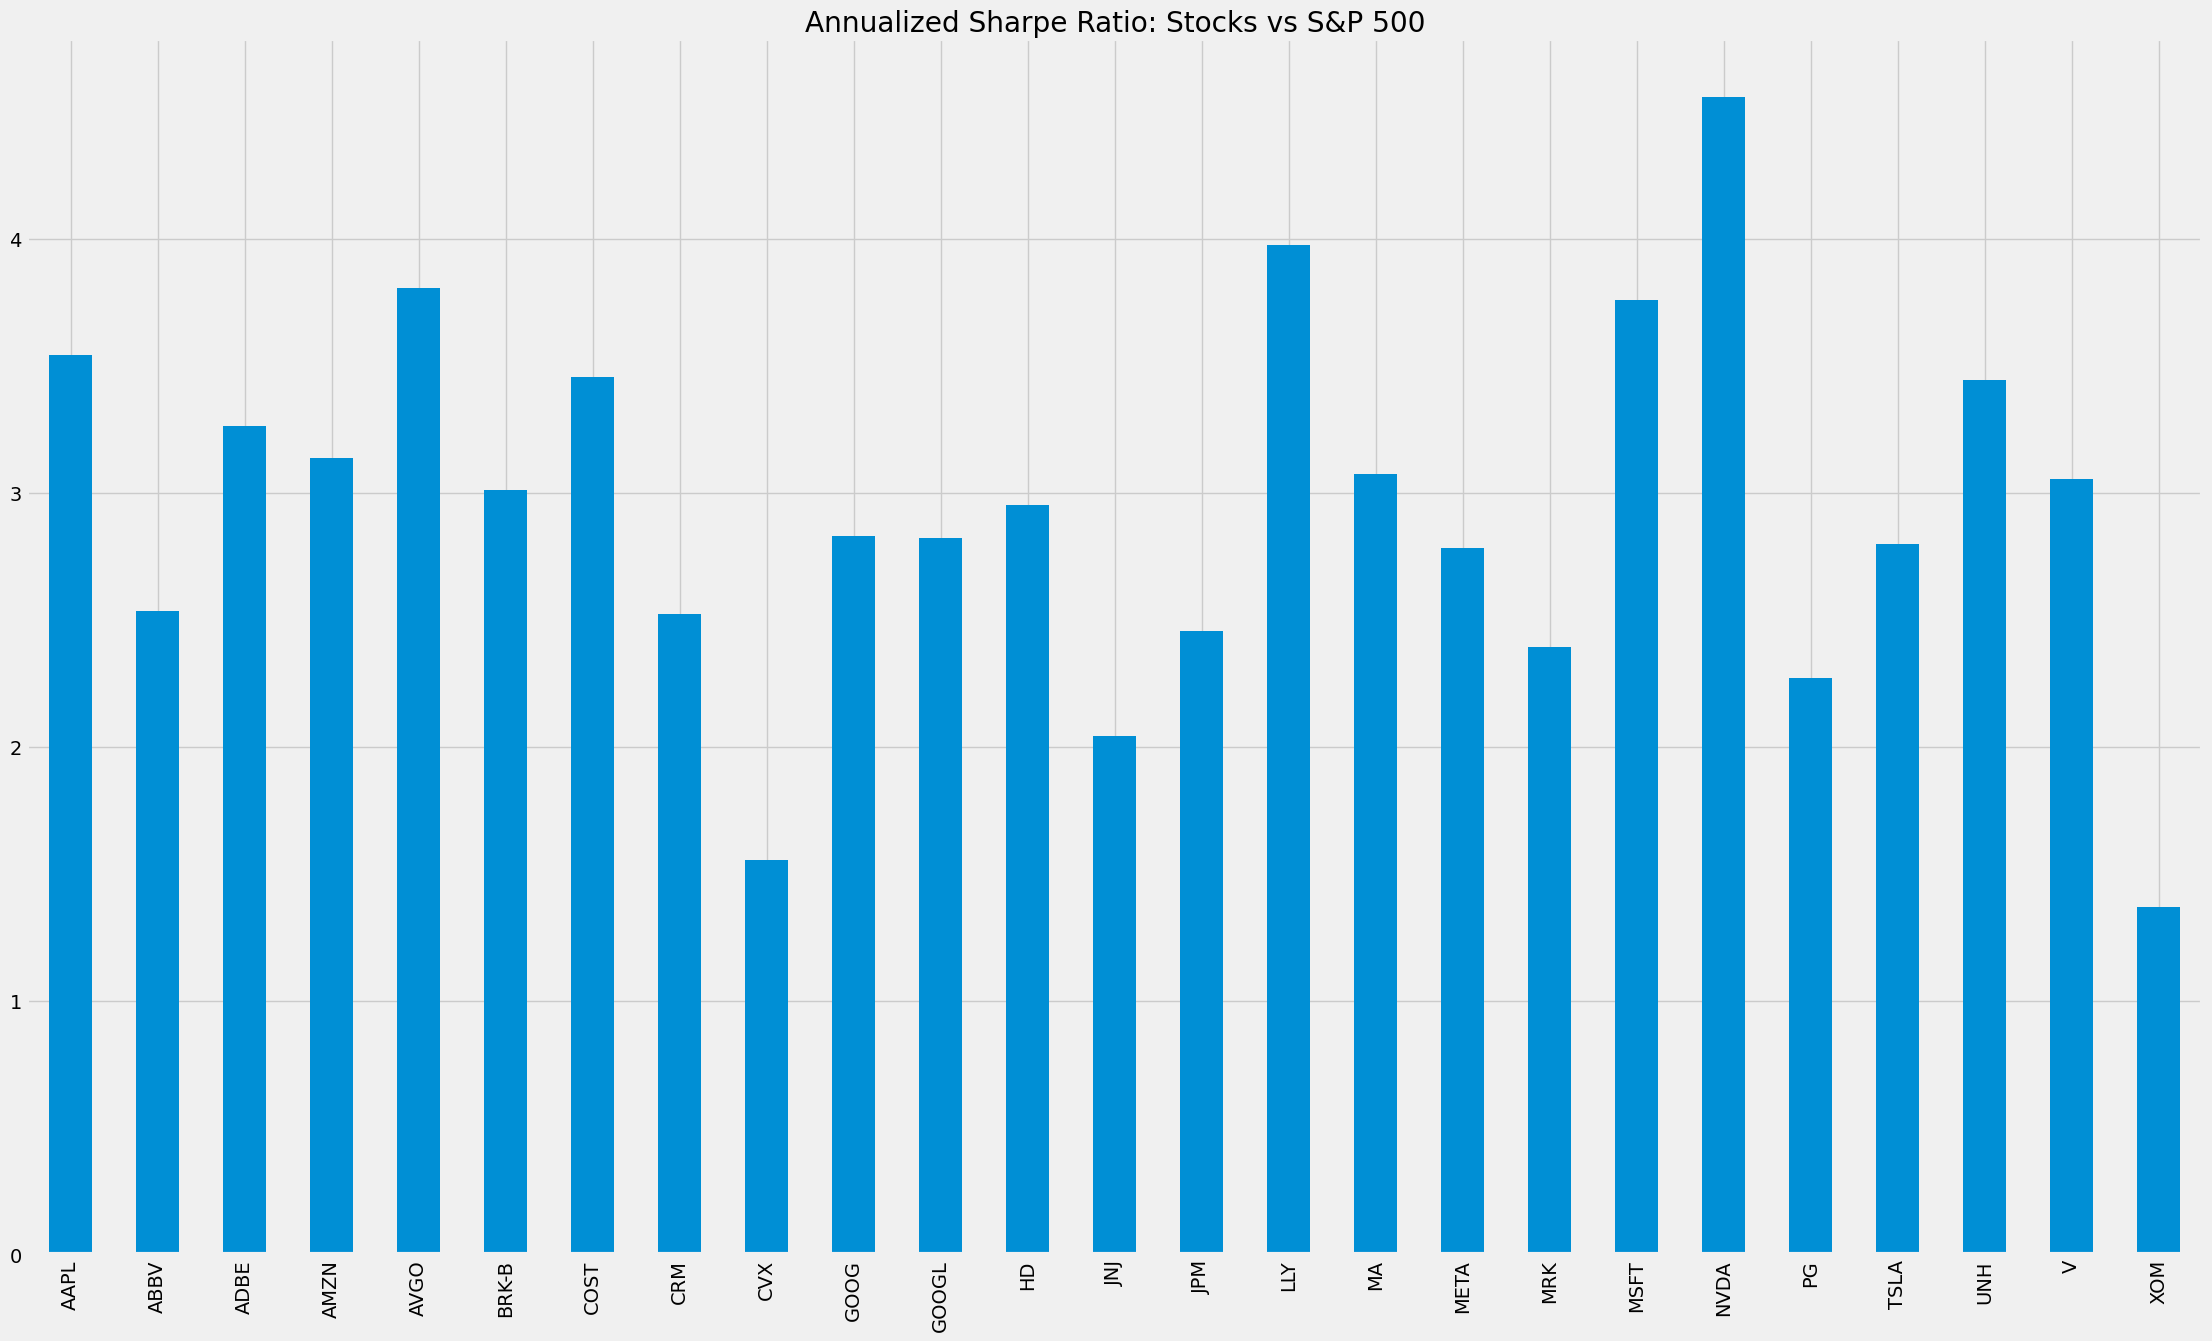

In [13]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(2517)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500',figsize=(25, 15))

# Create a DataFrame to hold the annualized Sharpe ratios
sharpe_ratio_df = pd.DataFrame(annual_sharpe_ratio, columns=['Annualized Sharpe Ratio'])

# Display the DataFrame
display(sharpe_ratio_df)

### 12. Analysis of Sharpe Ratio

#### Sharpe Ratio Interpretation:
- Less than 1: Bad
- 1 – 1.99: Adequate/good
- 2 – 2.99: Very good
- Greater than 3: Excellent

##### Based on the Sharpe Ratios for all the 25 stocks, we can see that all of it is above 1, meaning that it will have a better performance in terms of risk adjustment.


## Calculate the Beta of the Stocks

##### Iterating over each stock's excess returns, and to fit a linear regression model where each stock's excess returns are regressed against the excess returns of the benchmark (S&P 500), and calculates the beta coefficient representing the sensitivity of each stock's returns to changes in the benchmark's returns.

##### Essentially, calculates how much a stock's returns change in response to changes in the market (S&P 500), helping to understand how closely a stock follows the market trends.

In [18]:
from sklearn.linear_model import LinearRegression

# Create an empty dictionary to store beta values for each stock
betas = {}

# Perform linear regression for each stock
for symbol, excess_return in excess_returns.items():
    # Drop NaN values from excess returns
    excess_return = excess_return.dropna()
    
    # If there are no excess returns data after dropping NaNs, skip this stock
    if excess_return.empty:
        continue
    
    # Reshape the excess returns of the stock to fit into the LinearRegression model
    X = excess_return.values.reshape(-1, 1)
    
    # Extract the excess returns of the benchmark (S&P 500)
    benchmark_excess_return = excess_returns.iloc[:, 0].dropna().values.reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression().fit(X, benchmark_excess_return)
    
    # The coefficient of the linear regression model represents the beta
    beta = model.coef_[0][0]
    
    # Store beta value for the stock
    betas[symbol] = beta

# Convert beta values into a DataFrame for easy viewing
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

# Display beta values for each stock
display(beta_df)


,Beta
AAPL,1.000000
ABBV,0.460578
ADBE,0.599353
AMZN,0.551194
AVGO,0.546456
BRK-B,0.845842
COST,0.732331
CRM,0.505345
CVX,0.448733
GOOG,0.687664


### Analysis of Beta values